In [8]:
%load_ext autoreload
%autoreload 2

import analyze_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from os.path import join as oj

save_dir = '/root/interpretable-autoprompting/results/autoprompt_n_tokens'
nested_dirs = ['', 'autoprompt_2_tokens', 'autoprompt_3_tokens']

results = []
for n in nested_dirs:
    df = analyze_utils.load_results_and_cache_autoprompt_json(oj(save_dir, n), save_file='r.pkl')
    results.append(df)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 28.18it/s]


skipping /root/interpretable-autoprompting/results/autoprompt_n_tokens/Sep_27_18_22_dwtgmlqucavl/results.pkl (run still in progress?)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.90it/s]


skipping /root/interpretable-autoprompting/results/autoprompt_n_tokens/autoprompt_3_tokens/Sep_27_09_25_dwtgmlqucavl/results.pkl (run still in progress?)


In [55]:
import pandas as pd
df = pd.concat(results, axis=0).groupby(
    ['task_name', 'model_cls', 'num_learned_tokens', 'seed']
).first().reset_index()

In [56]:
import seaborn as sns

In [57]:
cc['prefix_train_acc'].isna().sum()

0

In [60]:
_d = cc[cc['model_cls'] == 'genetic'].sort_values(by='prefix_train_loss').groupby('num_learned_tokens').first()

<AxesSubplot: xlabel='num_learned_tokens', ylabel='prefix_train_acc'>

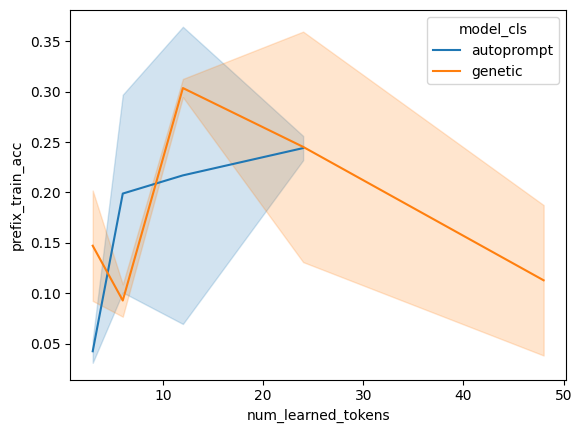

In [67]:
cc = df[df['task_name'] == 'task1146_country_capital']

sns.lineplot(cc, x='num_learned_tokens', y='prefix_train_acc', hue='model_cls')

In [72]:
add[['model_cls', 'prefixes']].tolist()

AttributeError: 'DataFrame' object has no attribute 'tolist'

<AxesSubplot: xlabel='num_learned_tokens', ylabel='prefix_train_acc'>

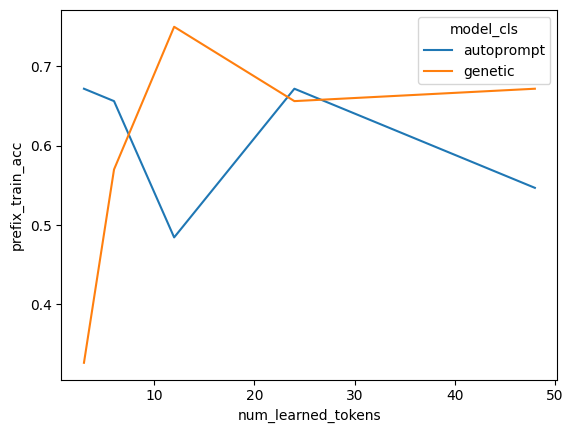

In [68]:
add = df[df['task_name'] == 'add_two']

sns.lineplot(add, x='num_learned_tokens', y='prefix_train_acc', hue='model_cls')

<AxesSubplot: xlabel='num_learned_tokens', ylabel='prefix_train_acc'>

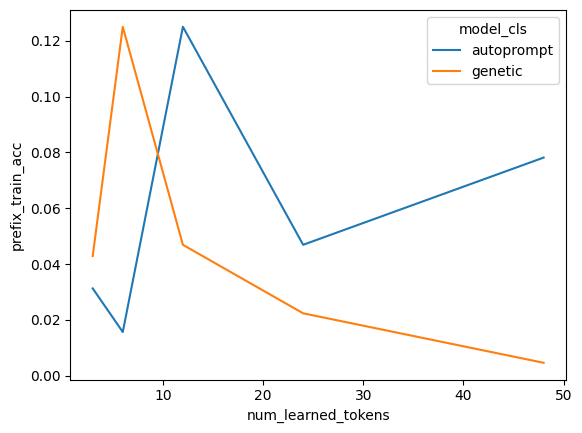

In [69]:
add = df[df['task_name'] == 'multiply_two']

sns.lineplot(add, x='num_learned_tokens', y='prefix_train_acc', hue='model_cls')